# 과제 안내 & 접근방식
 - 안내 : MusicVAE와 groove MIDI dataset을 활용하여 드럼 샘플을 추출하세요
 - 접근방식 
    - musicVAE는 A Hierarchical Latent Vector Model
for Learning Long-Term Structure in Music과 관련 있었고, magenta라는 프레임워크 속에서 찾을 수 있었습니다. 
    - magenta는 구글이 음악 작곡 관련하여 진행한 프로젝트로 볼 수 있으며, 전폭적인 지지를 받고 있는 것으로 보이지 않으나, 특정 user를 타겟팅하고 있다는 것을 가시적으로 확인할 수 있었습니다. 
    - Groove MIDI dataset은 드럼의 구성 요소들의 소리르 모아둔 데이터 파일이였습니다. 
    - 즉, 과제는 드럼 요소별 소리를 활용하여 드럼 연주 4마디를 생성할 수 있는지 묻는 테스트로 이해하고 프로젝트를 진행하였습니다. 

# AutoEncoder & VAE
 -  
오토인코더(이하 AE 표기함)란 무엇인가?  
 - AE를 핵심키워드로 알아보도록 하겠습니다. 물론 다 아시겠지만, 저도 과제를 위해 다시 한번 정리를 해보았습니다. 
    - unsupervised learning : 학습 방법은 비교사 방법으로 학습이 진행됩니다. 
    - ML density estimation : loss function을 negative Maxium likelihood로 정의하고 이를 추정합니다. negative loss를 최소화면 maxium likelihood가 되는 것이니까요 
    - dimension reduction : 일반적으로 AE의 중간 차원은 입력의 차원보다 작게 설정하는게 일반적인데 이러한 차원 축소(dimensionality reduction)이 일어나는 효과가 있다고 볼 수 있습니다. 
    - Manifold learning : unsupervied learning을 통해 training data를 잘 표현하는 어떠한 sub space를 찾아가는 훈련을 의미합니다. 
    - Generative model learning : 당연히 Decoder에서는 이미지나 텍스트를 생성하는 역할을 하게 됩니다. 


 - AE에서 가장 큰 문제점은 데이터의 분포에서 가깝게 배치되어 있는 것들이 데이터의 의미적으로 보았을 때도 유사하지 않다는 것이 가장 큰 문제였습니다. 이를 해결하기 위해 denoising하기도 했는데, denoising함으로써 의미적으로 데이터가 분포되어 있는 것에서 아주 미세한 denoise를 줌으로써 그 금방에 있는 다른 데이터를 만드는 것을 목적으로 하고 이렇게 하니 훨씬 학습이 잘 되었다라는 결과들이 나오게 시작합니다. 그럼에도 불구하고 아래와 같은 문제가 발생됩니다. 

 - Variational AutoEncoder(이하 VAE로 표기)는 어떤 과정에서 파생되었는가?  

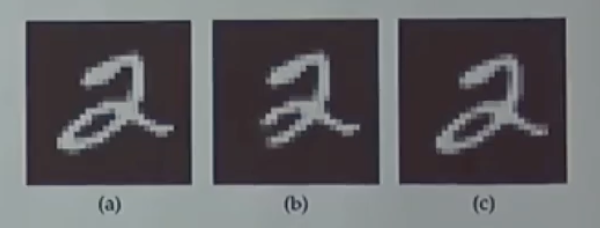

    - (a) : 원본데이터 
    - (b) : 숫자 2의 앞쪽을 자른 데이터 
    - (c) : 픽셀을 우측으로 한칸씩 밀어놓은 데이터 


 - a,b,c 간에 mse를 구하게 되면 a와 b가 더 가깝다고 계산이되고 모델은 b를 생성하는 쪽으로 학습이 진행되게 됩니다. 이러한 문제를 해결하기 위해서 VAE가 나오게 됩니다. (의미적으로는 c가 a와 가깝지만, MSE 계산적으로는 b가 a와 더 가깝다는 것입니다.)

 - 우리는 이러한 문제를 해결하기 위해 이상적으로 샘플링을 잘하는 함수(의미적으로도 가깝고, loss value도 늦은 데이터를 잘 찾는 함수)가 있다고 가정해보겠습니다. 있다는 것은 우리가 알지만, 그 함수가 무엇인지 모릅니다. 
이럴 때, 이상적인 함수를 추정하기 위해 variational inference 방법을 사용하게 되고 variational inference를 활용하는 AE를 우리는 VAE라고 합니다. 그렇다면 variational inference가 무엇일까요? variational inference란, true posterior가 있고, 우리가 다루기 쉬운 가우시안 분포 등을 이용하여 최대한 true posterior에 가깝게 확률분포를 만들어보자는 원리를 활용한 학습 방법을 이야기합니다. 

 - MusicVAE는 VAE를 활용하여 음악의 작곡 등 번거로운 이슈를 해결해보겠다 라는 관점으로 접근한 것입니다. 




- MusicVAE는 어떤 이슈를 해결하기 위해 나오게 되었는가?  
     - VAE models have difficulty modeling sequences with long-term structure. 
     - musicVAE solve this problem to use hierarchical decoder 


- MusicVAE summary 
    - The goal of the model is to capture the complex hierarchical relationships between different musical elements, such as notes, chords, and phrases, in order to generate coherent musical sequences.
    - encoder : bidirectional LSTM( 대조군 : LSTM state size of 2048 and 512 latent dimensions )
    - decoder : hierarchical(bottom-level) RNN
    - loss : ELBO_loss(binary cross-entropy)


# 프로세스(전처리 -> 학습 -> 생성) 정리 
 - 프로임워크 
        - 선택 : Tensorflow 
        - 사유 : 구글에서 작성한 코드로써, TF1 코드들이 믹스되어 있고, 프로젝트를 진행하면서 torch 전환하는 것까지는 무리라고 생각하여 Tensorflow를 사용하였다. 

In [1]:
# magenta 라이브러리 설치 
!pip install -q magenta 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 55.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 KB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 57.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 51.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 65.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.5/204.5 KB 22.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 100.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.1/210.1 KB 20.9 MB/s eta 0:00:0

In [2]:
# 출력물을 깔끔하게 출력하기 위해 warnings 추가함 
import warnings 
warnings.filterwarnings('ignore')
warnings.simplefilter("ignore")

# 전처리를 위한 라이브러리 
import os
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

import numpy as np 
import pandas as pd 
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
tf.compat.v1.disable_eager_execution()

import zipfile
import pathlib
import collections 
import note_seq # sequence를 midi로 만들기 위한 라이브러리 (magenta에서 제공함 )
from magenta.scripts.convert_dir_to_note_sequences import convert_directory

# 모델링을 위한 라이브러리 ( magenta )
import tf_slim 
from magenta.common import merge_hparams 
from magenta.contrib import training as contrib_training 
from magenta.models.music_vae import data, configs, lstm_models, MusicVAE
from magenta.models.music_vae.trained_model import TrainedModel 

Instructions for updating:
non-resource variables are not supported in the long term


In [3]:
# 데이터 로드 
data_url = "https://storage.googleapis.com/magentadata/datasets/groove/groove-v1.0.0-midionly.zip"
download_path = tf.keras.utils.get_file(origin=data_url, fname="/content/groove_data.zip", extract=True)
data_path = pathlib.Path(download_path)
zipfile.ZipFile('/content/groove_data.zip').extractall()


3260318/3260318 [==============================] - 0s 0us/step


 - 위 과정을 거치면 아래 사진처럼 여러 가지 폴더들이 보인다. 
 - 다 midi 파일인데 이를 다운받아서 garageband라는 맥 내장된 프로그램을 사용하여 들어보게 되면 드럼 연주들이 있는 것을 확인 할 수 있다. 
 - 장르별로 파일이 존재하며, 각각의 파일의 길이는 모두 다른데 readme 파일에 있는 링크로 들어가보면 아래와 같이 정보들을 확인할 수 있다. 

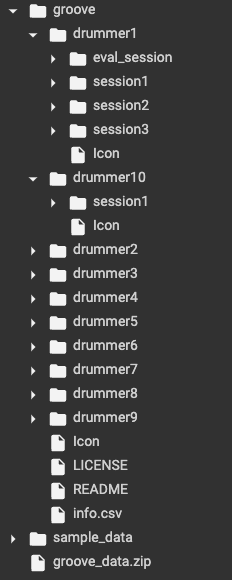

 - 데이터에 대한 분포
 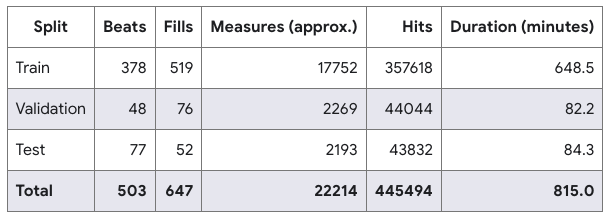

 - 이는 드럼의 각 구성요소별로 소리가 몇번 들어있는지를 나타내주는 표이다. 
 - 본 지원자는 다행스럽게도 드럼을 배웠기에 해당 표가 나타내는 의미를 쉽게 이해할 수 있었다. 
 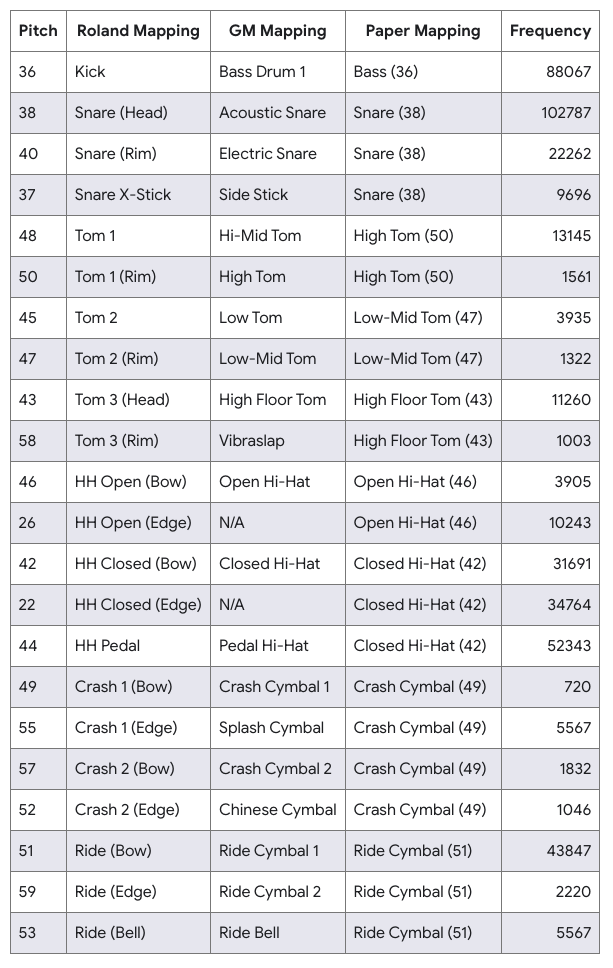

 - Tom에도 1,2 Rim & Crash에도 bow, edge 등으로 구분이 되는데 이는 드럼 구성요소의 어느 위치를 치는지를 나태내는 것이라고 보면 된다. 
 - 드럼의 구성요소들의 스틱과 맞닫는 위치마다 소리가 다르게 나고 이를 활용하여 더욱 풍성한 소리 구성을 낼 수 있다.
 - 위와 같은 내용은 info.csv파일에 아주 잘 정리가 되어 있다. 

In [4]:
drum_info = pd.read_csv("/content/groove/info.csv")
print("data의 수 : ", drum_info.shape)

# "해당 데이터로 훈련을 하면 어떤 종류의 드럼이 나오는지를 확인할 필요가 있다. 
print("---")
print("데이터의 종류")
print(drum_info["style"].unique())
print("---")
# 보통 음악은 하나로 딱 정의할 수가 없기에 jazz에 swing 스타일을 jazz/swing으로 표기를 해놓은 것 같다. 
# 그럼 우리는 대략적으로 rock이 얼마가 있고, soul이 얼마나 있는지를 확인할 필요가 있다. 그래서 뒤에 있는 것을 때고 데이터의 수를 한번 살펴볼 필요가 있다고 생각한다. 
major_classifier = [i.split("/")[0] for i in drum_info["style"].unique()]
from collections import Counter
print("데이터 장르 분류")
major = Counter(major_classifier)
sorted(major.items(), key=lambda pair: pair[1], reverse=True)


data의 수 :  (1150, 11)
---
데이터의 종류
['funk/groove1' 'soul/groove10' 'funk/groove2' 'soul/groove3'
 'soul/groove4' 'funk/groove5' 'hiphop/groove6' 'pop/groove7'
 'rock/groove8' 'soul/groove9' 'funk' 'jazz/funk' 'neworleans/secondline'
 'dance/disco' 'funk/fast' 'latin/brazilian-baiao' 'afrocuban' 'reggae'
 'reggae/slow' 'rock/halftime' 'funk/purdieshuffle' 'latin/samba' 'jazz'
 'rock/shuffle' 'jazz/mediumfast' 'jazz/fast' 'latin/reggaeton'
 'dance/breakbeat' 'neworleans/funk' 'latin/chacarera' 'country'
 'funk/rock' 'rock/prog' 'afrocuban/bembe' 'gospel' 'afrocuban/rhumba'
 'rock' 'punk' 'jazz/march' 'rock/folk' 'afrobeat' 'latin/bomba'
 'afrocuban/calypso' 'jazz/swing' 'rock/rockabilly' 'jazz/linear' 'hiphop'
 'jazz/klezmer' 'latin/brazilian' 'blues/shuffle' 'latin/merengue'
 'latin/brazilian-bossa' 'latin/brazilian-sambareggae'
 'latin/brazilian-songo' 'middleeastern' 'latin/brazilian-samba'
 'latin/brazilian-maracatu' 'latin/venezuelan-merengue'
 'latin/dominican-merengue' 'latin/venez

[('latin', 21),
 ('jazz', 9),
 ('funk', 8),
 ('rock', 8),
 ('soul', 6),
 ('neworleans', 4),
 ('afrocuban', 4),
 ('pop', 3),
 ('hiphop', 2),
 ('dance', 2),
 ('reggae', 2),
 ('country', 1),
 ('gospel', 1),
 ('punk', 1),
 ('afrobeat', 1),
 ('blues', 1),
 ('middleeastern', 1),
 ('highlife', 1)]

In [5]:
drum_info['major'] = drum_info["style"].str.split("/").str[0]
condition = (drum_info['major'] == "latin") | (drum_info['major'] == "jazz") | (drum_info['major'] == "funk") | (drum_info['major'] == "rock")
print("latin, jazz, funk, rock의 bpm 평균 : ", drum_info[condition]["bpm"].mean())

latin, jazz, funk, rock의 bpm 평균 :  111.43633762517882


이러한 데이터의 분포를 보았을 때, latin, jazz, funk한 장르로 드럼 연주가 생성될 가능성이 높다고 보고, 데이터의 분포를 기준으로 bpm을 예상해보았을 때 111 정도가 되지 않을까 예상해봅니다.

## 전처리 
 - midi 파일을 어떻게 전처리를 해야할까 고민을 많이하고 서칭을 많이 해본 결과, magenta에서 전처리할 수 있도록 다양한 코드를 작성해두었습니다.  
 - 파일을 midi로 바꿀 수도 있고, 폴더 자체를 midi로 바꿀 수도 있도록 친절하게 전처리 코드를 제공합니다. 
 - 저는 이중에서 convert_directory를 이용할 예정입니다. 
 - 이 함수는 data_path와 전처리되고 저장될 path를 입력을 받습니다.
 - output_file은 NoteSequence protos TFRecord 형식입니다. 

In [6]:
data_path = "/content/groove"
output_path = '/content/drum.tfrecord'
convert_directory(data_path, output_path, recursive=True) 

- 위 실행결과를 보면, midi 파일만 활용했다는 것을 볼 수 있습니다. 
- 일단, 과제를 위해서 convert_directory를 사용하여 파일을 직렬화하였지만, 파일의 크기가 엄청컸을 때는 이러한 방식으로 직열화 할 수 없을것이라고 생각이 듭니다. 더 큰 파일을 다루기 위해 어떠한 방식을 사용하였는지는 추가적으로 조사할 예정입니다. 

## 학습(모델 훈련)
 - 모델을 훈련시키기 위해 magenta를 쭉~ 써칭해보았습니다. 
 - TrainedModel가 정의되어 있는 경로 : magenta/magenta/models/music_vae/trained_model.py  
 - TrainedModel가 사용되는 경로 : magenta/magenta/models/music_vae/music_vae_generate.py 에서 호출됩니다. 
 - 근데, 정말 독특한 것은 config에 모델을 감싸서 활용을 하는게 신기하였습니다. 
 - config가 정의되어 있는 경로 : magenta/magenta/models/music_vae/configs.py
 - 쭉 코드를 훑어보았을때 여러가지 하모니를 만들때 이 map dict를 활용하여 만들 수 있도록 해놓은 것으로 파악하였습니다. 
 - ipynb에서 실행할때 필요한 부분들만 가져오도록 하겠습니다. 

In [7]:
# config 설정 
HParams = contrib_training.HParams

class Config(collections.namedtuple('Config',
                                    ['model', 'hparams', 'note_sequence_augmenter', 'data_converter',
                                     'train_examples_path', 'eval_examples_path', 'tfds_name'])):
    def values(self):
        return self._asdict()

Config.__new__.__defaults__ = (None,) * len(Config._fields)


def update_config(config, update_dict):
    config_dict = config.values()
    config_dict.update(update_dict)
    return Config(**config_dict)

# config map 설정 
CONFIG_MAP = {}
CONFIG_MAP["drum"] = Config(
                            model=MusicVAE(
                                            lstm_models.BidirectionalLstmEncoder(), # 위에서 언급한 Encoder 부분  
                                            lstm_models.GrooveLstmDecoder()), # 위에서 언급한 Decoder 부분 
                            # groove 데이터를 다루고 있기에 groovae_4bar 파라미터 참고하여 설정 
                            hparams=merge_hparams(
                                                    lstm_models.get_default_hparams(),
                                                    HParams(
                                                            batch_size=512, 
                                                            max_seq_len=64,  #  # 4 bars w/ 16 steps per bar - 한마디를 16step으로 설정됨 
                                                            z_size=256, 
                                                            enc_rnn_size=[512], 
                                                            dec_rnn_size=[256, 256],
                                                            max_beta=0.2,
                                                            free_bits=48,
                                                            dropout_keep_prob=0.3, 
                                                    )
                                                ),
                            note_sequence_augmenter=None,
                            data_converter=data.GrooveConverter(
                                                                split_bars=4, 
                                                                steps_per_quarter=4, 
                                                                quarters_per_bar=4,
                                                                max_tensors_per_notesequence=20,
                                                                pitch_classes=data.ROLAND_DRUM_PITCH_CLASSES,
                                                                inference_pitch_classes=data.REDUCED_DRUM_PITCH_CLASSES
                                                                ),
                            train_examples_path='/content/drum.tfrecord', #데이터 경로 설정
                            )


In [8]:
def _get_input_tensors(dataset, config):
    batch_size = config.hparams.batch_size
    iterator = tf.data.make_one_shot_iterator(dataset)
    (input_sequence, output_sequence, control_sequence, sequence_length) = iterator.get_next()
    input_sequence.set_shape([batch_size, None, config.data_converter.input_depth])
    output_sequence.set_shape([batch_size, None, config.data_converter.output_depth])
    
    if not config.data_converter.control_depth:
        control_sequence = None
    else:
        control_sequence.set_shape([batch_size, None, config.data_converter.control_depth])
        sequence_length.set_shape([batch_size] + sequence_length.shape[1:].as_list())
        
    return {
            'input_sequence': input_sequence,
            'output_sequence': output_sequence,
            'control_sequence': control_sequence,
            'sequence_length': sequence_length
            }

In [9]:
def train(train_dir, config, dataset_fn, checkpoints_to_keep=5, keep_checkpoint_every_n_hours=1, num_steps=None, master='', num_sync_workers=0, num_ps_tasks=0, task=0):


    tf.gfile.MakeDirs(train_dir)
    is_chief = (task == 0)

    with tf.Graph().as_default():
        with tf.device(tf.train.replica_device_setter(num_ps_tasks, merge_devices=True)):
            model = config.model
            model.build(config.hparams,
                        config.data_converter.output_depth,
                        is_training=True)
            optimizer = model.train(**_get_input_tensors(dataset_fn(), config))

            hooks = []
            if num_sync_workers:
                optimizer = tf.train.SyncReplicasOptimizer(optimizer,num_sync_workers)
                hooks.append(optimizer.make_session_run_hook(is_chief))

            grads, var_list = list(zip(*optimizer.compute_gradients(model.loss)))
            global_norm = tf.global_norm(grads)
            tf.summary.scalar('global_norm', global_norm)
            
            if config.hparams.clip_mode == 'value':
                g = config.hparams.grad_clip
                clipped_grads = [tf.clip_by_value(grad, -g, g) for grad in grads]
            elif config.hparams.clip_mode == 'global_norm':
                clipped_grads = tf.cond(
                                        global_norm < config.hparams.grad_norm_clip_to_zero,
                                        lambda: tf.clip_by_global_norm( grads, config.hparams.grad_clip, use_norm=global_norm)[0],
                                        lambda: [tf.zeros(tf.shape(g)) for g in grads]
                                        )
            else:
                raise ValueError(
                    'Unknown clip_mode: {}'.format(config.hparams.clip_mode))
            train_op = optimizer.apply_gradients(
                                                list(zip(clipped_grads, var_list)),
                                                global_step=model.global_step,
                                                name='train_step'
                                                )
            logging_dict = {'global_step': model.global_step, 'loss': model.loss}
            hooks.append(tf.train.LoggingTensorHook(logging_dict, every_n_iter=100))
            if num_steps:
                hooks.append(tf.train.StopAtStepHook(last_step=num_steps))
                
            scaffold = tf.train.Scaffold(saver=tf.train.Saver(max_to_keep=checkpoints_to_keep, keep_checkpoint_every_n_hours=keep_checkpoint_every_n_hours))
            tf_slim.training.train(
                                    train_op=train_op,
                                    logdir=train_dir,
                                    scaffold=scaffold,
                                    hooks=hooks,
                                    save_checkpoint_secs=60,
                                    master=master,
                                    is_chief=is_chief
                                   )


In [10]:
def run(config_map,
        tf_file_reader=tf.data.TFRecordDataset,
        file_reader=tf.python_io.tf_record_iterator,
        is_training=True):
    config = CONFIG_MAP["drum"]
    train_dir = "/content/weights"
    num_steps = 20 # 몇번 가중치를 업데이트 할 것인지 설정 합니다. 
    
    def dataset_fn():
        return data.get_dataset(
                                config,
                                tf_file_reader=tf_file_reader,
                                is_training=True,
                                cache_dataset=True
                                )
    
    if is_training == True:
        train(
                train_dir,
                config=config,
                dataset_fn=dataset_fn,
                num_steps=num_steps
              )      
    else:
        print("EVAL")


In [11]:
run(CONFIG_MAP)

Instructions for updating:
Use `tf.cast` instead.
Instructions for updating:
Please use `keras.layers.Bidirectional(keras.layers.RNN(cell))`, which is equivalent to this API
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.


In [12]:
model_config = Config(
                        model=MusicVAE(
                                        lstm_models.BidirectionalLstmEncoder(), # 위에서 언급한 Encoder 부분  
                                        lstm_models.GrooveLstmDecoder()), # 위에서 언급한 Decoder 부분 
                        # groove 데이터를 다루고 있기에 groovae_4bar 파라미터 참고하여 설정 
                        hparams=merge_hparams(
                                                lstm_models.get_default_hparams(),
                                                HParams(
                                                        batch_size=512, 
                                                        max_seq_len=64,  #  # 4 bars w/ 16 steps per bar - 한마디를 16step으로 설정됨 
                                                        z_size=256, 
                                                        enc_rnn_size=[512], 
                                                        dec_rnn_size=[256, 256],
                                                        max_beta=0.2,
                                                        free_bits=48,
                                                        dropout_keep_prob=0.3, 
                                                )
                                            ),
                        note_sequence_augmenter=None,
                        data_converter=data.GrooveConverter(
                                                            split_bars=4, 
                                                            steps_per_quarter=4, 
                                                            quarters_per_bar=4,
                                                            max_tensors_per_notesequence=20,
                                                            pitch_classes=data.ROLAND_DRUM_PITCH_CLASSES,
                                                            inference_pitch_classes=data.REDUCED_DRUM_PITCH_CLASSES
                                                            ),
                    )

## 생성(inference)

In [13]:
model = TrainedModel(
                    config=model_config,
                    batch_size=1,
                    checkpoint_dir_or_path="/content/weights"
                    )

In [15]:
generated_sequence = model.sample(n=1, length=16*4, temperature=0.5)
note_seq.sequence_proto_to_midi_file(generated_sequence[0], '/content/drum_4bar.mid')